Extracting the Dataset

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"srirupinpotula","key":"ca97d95d40429d3e4f783eaa67a5c941"}'}

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
mv kaggle.json /root/.kaggle

In [ ]:
!kaggle datasets download -d jonathanoheix/face-expression-recognition-dataset

face-expression-recognition-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
ls /content/face-expression-recognition-dataset.zip

/content/face-expression-recognition-dataset.zip


In [ ]:
ls

drive/  face-expression-recognition-dataset.zip  images/  sample_data/


In [ ]:
!unzip /content/face-expression-recognition-dataset.zip

Archive:  /content/face-expression-recognition-dataset.zip
replace images/images/train/angry/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace images/images/train/angry/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
ls images

images/  train/  validation/


In [ ]:
cd images

/content/images


In [ ]:
pwd


'/content/images'

In [ ]:
ls

images/  train/  validation/


In [ ]:
cd ../


/content


In [ ]:
rm -rf images

In [ ]:
ls


drive/  face-expression-recognition-dataset.zip  sample_data/


In [ ]:
!unzip face-expression-recognition-dataset.zip


Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
ls images

images/  train/  validation/


Dataset Extraction for various images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_generator = ImageDataGenerator(
    rescale=1/255.,              # normalize pixel values between 0-1
    brightness_range=[0.1, 0.7], # specify the range in which to decrease/increase brightness
    width_shift_range=0.5,       # shift the width of the image 50%
    rotation_range=90,           # random rotation by 90 degrees
    horizontal_flip=True,        # 180 degree flip horizontally
    vertical_flip=True,          # 180 degree flip vertically
    validation_split=0.15        # 15% of the data will be used for validation at end of each epoch
)



In [ ]:
import os

class_subset = sorted(os.listdir('/content/images/images'))[:7]

In [ ]:
train_generator = train_datagen.flow_from_directory(
        '/content/images/train',
        target_size=(48, 48),
        class_mode='categorical'
)

Found 28821 images belonging to 7 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
        '/content/images/validation',
        target_size=(48, 48),
        class_mode='categorical')

Found 7066 images belonging to 7 classes.


Model Definition

In [ ]:
import tensorflow as tf

model = tf.keras.models.Sequential([

    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(48, 48, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 46, 46, 16)        448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 21, 21, 16)        2320      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 10, 10, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 32)          4640      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 4, 4, 32)        

**Compile the Model**

In [ ]:
from tensorflow.keras.optimizers import RMSprop

EPOCHS =  50
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=INIT_LR, decay=INIT_LR / EPOCHS)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=[tf.keras.metrics.CategoricalAccuracy(), tf.keras.metrics.AUC()]
              )

In [139]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('categorical_accuracy') >= 0.85):
      print("\nReached 85% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [ ]:
pwd

'/content'

In [ ]:
mkdir model

mkdir: cannot create directory ‘model’: File exists


In [ ]:
modelPath = "/content/model"

In [ ]:
history = model.fit(
      train_generator,
      epochs=50,
      verbose=1,
      validation_data = validation_generator,
      callbacks = [callbacks]
    )
tf.keras.models.save_model(model, modelPath+'CNN')

Epoch 1/50
901/901 [==============================] - 105s 117ms/step - loss: 1.1306 - categorical_accuracy: 0.5757 - auc_4: 0.8914 - val_loss: 1.2023 - val_categorical_accuracy: 0.5573 - val_auc_4: 0.8802
Epoch 2/50
901/901 [==============================] - 109s 121ms/step - loss: 1.0813 - categorical_accuracy: 0.5912 - auc_4: 0.9010 - val_loss: 1.2116 - val_categorical_accuracy: 0.5474 - val_auc_4: 0.8772
Epoch 3/50
901/901 [==============================] - 103s 115ms/step - loss: 1.0443 - categorical_accuracy: 0.6116 - auc_4: 0.9079 - val_loss: 1.2065 - val_categorical_accuracy: 0.5659 - val_auc_4: 0.8832
Epoch 4/50
901/901 [==============================] - 106s 118ms/step - loss: 0.9930 - categorical_accuracy: 0.6282 - auc_4: 0.9170 - val_loss: 1.2501 - val_categorical_accuracy: 0.5560 - val_auc_4: 0.8777
Epoch 5/50
901/901 [==============================] - 99s 110ms/step - loss: 0.9505 - categorical_accuracy: 0.6465 - auc_4: 0.9241 - val_loss: 1.2237 - val_categorical_accuracy

Visualize the Accuracy of the Model

In [ ]:
import matplotlib.pyplot as plt
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history[     'categorical_accuracy' ]
val_acc  = history.history[ 'val_categorical_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

Text(0.5, 1.0, 'Training and validation loss')

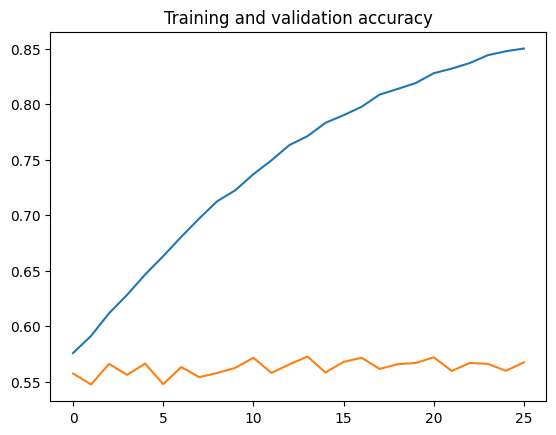

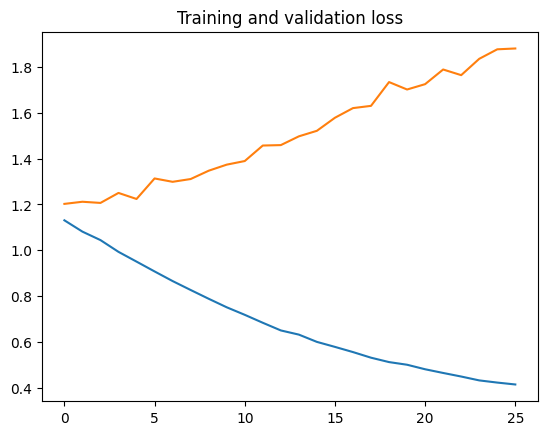

In [ ]:
#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
Trnasfer Learning

In [113]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2023-06-17 13:31:30--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.119.128, 172.253.114.128, 142.250.1.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M   140MB/s    in 0.6s    

2023-06-17 13:31:31 (140 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [114]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras import layers

# Set the weights file you downloaded into a variable
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

# Initialize the base model.
# Set the input shape and remove the dense layers.
pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                include_top = False,
                                weights = None)

# Load the pre-trained weights you downloaded.
pre_trained_model.load_weights(local_weights_file)

# Freeze the weights of the layers.
for layer in pre_trained_model.layers:
  layer.trainable = False

In [115]:
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_196 (Conv2D)            (None, 74, 74, 32)   864         ['input_6[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_196[0][0]']             
 Normalization)                                                                                   
                                                                                       

In [117]:
# Choose `mixed_7` as the last layer of your base model
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [132]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# Added a dropout rate of 0.2
x = layers.Dropout(0.2)(x)
# Add a final sigmoid layer for classification
x = layers.Dense  (7, activation='softmax')(x)

# Append the dense network to the base model
model = Model(pre_trained_model.input, x)

# Print the model summary. See your dense network connected at the end.
model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 150, 150, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_196 (Conv2D)            (None, 74, 74, 32)   864         ['input_6[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 74, 74, 32)  96          ['conv2d_196[0][0]']             
 Normalization)                                                                                   
                                                                                            

In [133]:
#Training parameters
model.compile(optimizer = RMSprop(learning_rate=0.0001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [134]:
train_dir = '/content/images/train'
validation_dir = '/content/images/validation'

In [135]:

train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator( rescale = 1.0/255. )


train_generator = train_datagen.flow_from_directory(train_dir,

                                                    class_mode = 'categorical',
                                                    target_size = (150, 150))


validation_generator =  test_datagen.flow_from_directory( validation_dir,

                                                          class_mode  = 'categorical',
                                                          target_size = (150, 150))

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [142]:
import tensorflow as tf
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') >= 0.70):
      print("\nReached 80% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [141]:
# Train the model
history = model.fit(train_generator,
            validation_data = validation_generator,
            epochs = 5,
            verbose = 1
          )

Epoch 1/5
901/901 [==============================] - 1330s 1s/step - loss: 1.4510 - accuracy: 0.4482 - val_loss: 1.3687 - val_accuracy: 0.4958
Epoch 2/5
901/901 [==============================] - 1325s 1s/step - loss: 1.4307 - accuracy: 0.4568 - val_loss: 1.2862 - val_accuracy: 0.5132
Epoch 3/5
901/901 [==============================] - 1318s 1s/step - loss: 1.4014 - accuracy: 0.4694 - val_loss: 1.2719 - val_accuracy: 0.5242
Epoch 4/5
901/901 [==============================] - 1320s 1s/step - loss: 1.3889 - accuracy: 0.4760 - val_loss: 1.2388 - val_accuracy: 0.5379
Epoch 5/5
901/901 [==============================] - 1327s 1s/step - loss: 1.3765 - accuracy: 0.4780 - val_loss: 1.2397 - val_accuracy: 0.5367


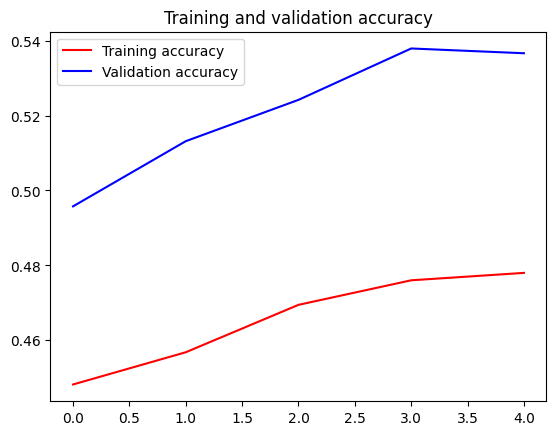

<Figure size 640x480 with 0 Axes>

In [145]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()